In [41]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
%matplotlib inline

# Exploratory Data Analysis

## Data Overview

In [42]:
df = pd.read_csv('Consumer_complaints.csv')

In [43]:
df.columns

Index([u'Date received', u'Product', u'Sub-product', u'Issue', u'Sub-issue',
       u'Consumer complaint narrative', u'Company public response', u'Company',
       u'State', u'ZIP code', u'Tags', u'Consumer consent provided?',
       u'Submitted via', u'Date sent to company',
       u'Company response to consumer', u'Timely response?',
       u'Consumer disputed?', u'Complaint ID'],
      dtype='object')

In [44]:
#df=df.sample(frac=0.01,replace=True)

In [45]:
#bank=pd.read_csv('bank_rank.csv')

In [46]:
df['Company'].value_counts()

Bank of America                                 55052
Wells Fargo & Company                           41057
JPMorgan Chase & Co.                            33075
Equifax                                         30115
Experian                                        29426
Citibank                                        24879
TransUnion Intermediate Holdings, Inc.          24169
Ocwen                                           20614
Capital One                                     15269
Nationstar Mortgage                             12840
U.S. Bancorp                                     9326
Synchrony Financial                              9159
Ditech Financial LLC                             8434
Navient Solutions, Inc.                          7775
PNC Bank N.A.                                    6807
Encore Capital Group                             6124
HSBC North America Holdings Inc.                 6057
Amex                                             5559
SunTrust Banks, Inc.        

In [47]:
df.shape

(537992, 18)

In [48]:
#bank.info()

In [49]:
#df=df.merge(bank,on='Company',how='left')

In [50]:
#df.Company

In [51]:
#df['rank'].value_counts(dropna=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537992 entries, 0 to 537991
Data columns (total 18 columns):
Date received                   537992 non-null object
Product                         537992 non-null object
Sub-product                     386187 non-null object
Issue                           537979 non-null object
Sub-issue                       203546 non-null object
Consumer complaint narrative    59697 non-null object
Company public response         75922 non-null object
Company                         537992 non-null object
State                           530979 non-null object
ZIP code                        533186 non-null object
Tags                            75267 non-null object
Consumer consent provided?      110728 non-null object
Submitted via                   537989 non-null object
Date sent to company            537992 non-null object
Company response to consumer    537992 non-null object
Timely response?                537992 non-null object
Consumer dis

In [53]:
df['Issue'].value_counts(dropna=False).shape

(96,)

In [56]:
DataFrame(df['Product'].value_counts(dropna=False)).T

,Mortgage,Debt collection,Credit reporting,Credit card,Bank account or service,Consumer Loan,Student loan,Payday loan,Money transfers,Prepaid card,Other financial service
Product,182212,97237,87166,64639,60977,20100,15392,3751,3669,2345,504


In [16]:
df['Sub-issue'].value_counts()

Account status                              25636
Debt is not mine                            25352
Information is not mine                     18785
Not given enough info to verify debt        11882
Frequent or repeated calls                  10940
Debt was paid                               10906
Account terms                                6854
Attempted to collect wrong amount            6069
Public record                                5287
Problem getting my free annual report        4753
Right to dispute notice not received         4428
Personal information                         4290
Problem with statement of dispute            3929
Repaying your loan                           3845
No notice of investigation status/result     3648
Threatened to take legal action              3408
Talked to a third party about my debt        3402
Problem getting report or credit score       3021
Report improperly shared by CRC              3020
Debt resulted from identity theft            2745


In [17]:
df['Issue'].value_counts()

Loan modification,collection,foreclosure    95392
Incorrect information on credit report      63350
Loan servicing, payments, escrow account    58655
Cont'd attempts collect debt not owed       40685
Account opening, closing, or management     25940
Communication tactics                       17700
Disclosure verification of debt             17431
Deposits and withdrawals                    16770
Application, originator, mortgage broker    12969
Billing disputes                            10715
Other                                       10481
Credit reporting company's investigation     9943
Managing the loan or lease                   9501
Problems caused by my funds being low        8836
False statements or representation           7972
Unable to get credit report/credit score     7774
Improper contact or sharing of info          7139
Settlement process and costs                 6719
Problems when you are unable to pay          6658
Taking/threatening an illegal action         6310


In [18]:
df['Company public response'].value_counts(dropna=False)

NaN                                                                                                                        462070
Company chooses not to provide a public response                                                                            52483
Company believes it acted appropriately as authorized by contract or law                                                    13855
Company has responded to the consumer and the CFPB and chooses not to provide a public response                              3283
Company believes complaint caused principally by actions of third party outside the control or direction of the company      1412
Company disputes the facts presented in the complaint                                                                        1288
Company believes the complaint is the result of a misunderstanding                                                           1247
Company can't verify or dispute the facts in the complaint                                

In [19]:
df['Company response to consumer'].value_counts(dropna=False)

Closed with explanation            390227
Closed with non-monetary relief     67985
Closed with monetary relief         37186
Closed without relief               17909
Closed                              13069
Closed with relief                   5305
In progress                          3667
Untimely response                    2644
Name: Company response to consumer, dtype: int64

In [20]:
df['Tags'].value_counts(dropna=False)

NaN                              462725
Older American                    43743
Servicemember                     25396
Older American, Servicemember      6128
Name: Tags, dtype: int64

In [21]:
df['Date received'].max()

'12/31/2015'

In [22]:
df['Date received'].min()

'01/01/2012'

In [23]:
df['Submitted via'].value_counts(dropna=False)

Web            348870
Referral       106700
Phone           38683
Postal mail     35504
Fax              7888
Email             344
NaN                 3
Name: Submitted via, dtype: int64

In [24]:
df['Timely response?'].value_counts(dropna=False)

Yes    524461
No      13531
Name: Timely response?, dtype: int64

In [25]:
df['Consumer disputed?'].value_counts(dropna=False)

No     429175
Yes    108817
Name: Consumer disputed?, dtype: int64

In [26]:
temp= pd.crosstab(df['Company response to consumer'], df['Consumer disputed?'])

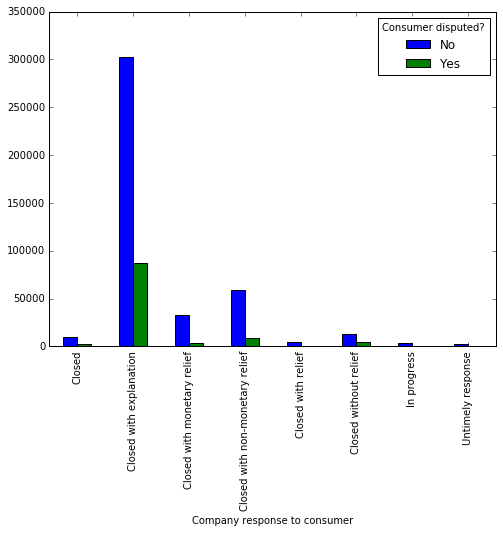

In [27]:
temp.plot(kind='bar',figsize=(8,6))## The disputed percentages are about same between 
###Consent and Consent Not "complaint narrative text".

In [28]:
temp1= pd.crosstab(df['Company response to consumer'], df['Consumer disputed?'])

In [29]:
temp1

Consumer disputed?,No,Yes
Company response to consumer,,
Closed,10243,2826
Closed with explanation,302637,87590
Closed with monetary relief,33101,4085
Closed with non-monetary relief,59237,8748
Closed with relief,4591,714
Closed without relief,13058,4851
In progress,3666,1
Untimely response,2642,2


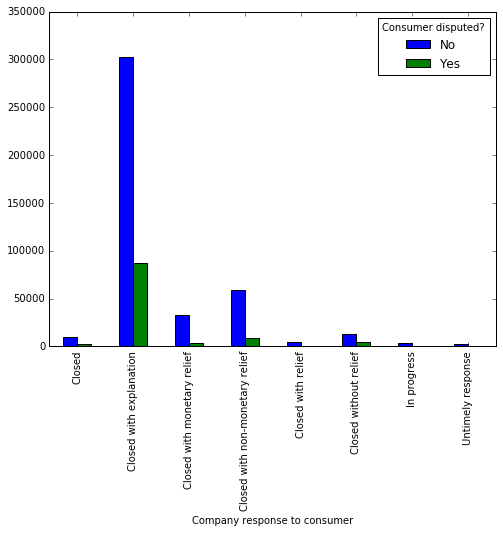

In [30]:
temp1.plot(kind='bar',figsize=(8,6)) ###Most cases are fall in closed with explaination

In [31]:
temp3= pd.crosstab(df['Product'], df['Consumer disputed?'])

In [36]:
temp3['rate'] = temp3['Yes'] / (temp3['Yes'] + temp3['No'])

In [40]:
temp3.sort_values('rate', ascending =False).T

Product,Mortgage,Consumer Loan,Credit card,Bank account or service,Student loan,Other financial service,Debt collection,Credit reporting,Payday loan,Money transfers,Prepaid card
Consumer disputed?,,,,,,,,,,,
No,139787.000000,15592.000000,51228.000000,48980.000000,12380.000000,407.00000,79657.000000,72782.000000,3166.000000,3154.000000,2042.000000
Yes,42425.000000,4508.000000,13411.000000,11997.000000,3012.000000,97.00000,17580.000000,14384.000000,585.000000,515.000000,303.000000
rate,0.232833,0.224279,0.207475,0.196746,0.195686,0.19246,0.180795,0.165018,0.155958,0.140365,0.129211


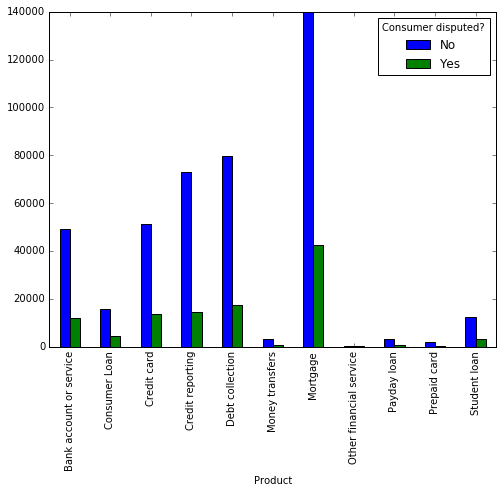

In [33]:
fig = plt.figure()
temp3.plot(kind='bar',figsize=(8,6))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rcParams.update({'font.size': 10})

plt.show()
fig.savefig('complaint_product_dis.png')

In [37]:
##plt.hist(np.log(df['Company'].value_counts()))
##plt.xlabel(df['Company'].value_counts().index)

In [38]:
df['State'].value_counts().shape

(62,)

In [39]:
df['Date received']=pd.DatetimeIndex(df['Date received'],format='%m/%d/%Y').date
df['Date sent to company']=pd.DatetimeIndex(df['Date sent to company'],format='%m/%d/%Y').date

In [40]:
df[df['Date received']!=df['Date sent to company']].shape

(314405, 18)

## Missing Value Handling

In [41]:
df[pd.isnull(df['Issue'])]

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
22604,2016-01-24,Bank account or service,Checking account,NaN,NaN,NaN,NaN,JPMorgan Chase & Co.,WI,530XX,NaN,NaN,Web,2016-01-24,Closed with explanation,Yes,Yes,1755250
31788,2016-01-05,Bank account or service,Checking account,NaN,NaN,NaN,Company chooses not to provide a public response,Citibank,CA,912XX,Older American,NaN,Web,2016-01-05,Closed with explanation,Yes,Yes,1726979
66703,2015-10-15,Bank account or service,Checking account,NaN,NaN,NaN,Company believes it acted appropriately as aut...,TCF National Bank,MN,553XX,NaN,NaN,Web,2015-10-15,Closed with monetary relief,Yes,No,1608941
69600,2015-10-09,Money transfers,Domestic (US) money transfer,NaN,NaN,NaN,NaN,"PayPal Holdings, Inc.",CA,900XX,NaN,NaN,Web,2015-10-09,Closed with explanation,Yes,No,1600411
80795,2015-09-16,Consumer Loan,Vehicle loan,NaN,NaN,NaN,NaN,Santander Consumer USA Holdings Inc,OR,978XX,NaN,NaN,Web,2015-09-16,Closed with explanation,Yes,Yes,1566496
82698,2015-09-11,Consumer Loan,Vehicle loan,NaN,NaN,NaN,Company chooses not to provide a public response,Ally Financial Inc.,TX,762XX,NaN,NaN,Web,2015-09-11,Closed with explanation,Yes,No,1560539
109106,2015-07-21,Bank account or service,Checking account,NaN,NaN,NaN,Company chooses not to provide a public response,"SunTrust Banks, Inc.",VA,22030,NaN,Consent not provided,Web,2015-07-21,Closed with monetary relief,Yes,No,1479745
184850,2015-02-10,Bank account or service,Other bank product/service,NaN,NaN,NaN,NaN,Wells Fargo & Company,FL,33428,NaN,NaN,Web,2015-02-10,Closed with explanation,Yes,No,1235087
186858,2015-02-05,Bank account or service,Checking account,NaN,NaN,NaN,NaN,JPMorgan Chase & Co.,FL,33487,Servicemember,NaN,Web,2015-02-05,Closed with monetary relief,Yes,No,1226302
225866,2014-10-29,Consumer Loan,Vehicle loan,NaN,NaN,NaN,NaN,USAA Savings,VA,23703,Servicemember,NaN,Web,2014-10-29,Closed with monetary relief,Yes,No,1092632


In [42]:
df['Sub-product'].fillna('Not Provided',inplace=True)
df['Sub-issue'].fillna('Not Provided',inplace=True)
df['Consumer complaint narrative'].fillna('None or Not Provided',inplace=True)
###Combine "company public missing value" with "Company chose not to provide"
df['Company public response'].fillna('Company chooses not to provide',inplace=True) 

###Combine missing value of "Issue" with "Other"
df['Issue'].fillna('Other',inplace=True) 

### Replace missing vlaues of 'Tags' with "'Unknown'
df['Tags'].fillna('Unknown',inplace=True) 

### Replace missing vlaues of 'Submitted via' with "'other'
df['Submitted via'].fillna('Other',inplace=True) 

###Combine missing value,other,and withdrawn of "Consumer consent provided? " 
###with Consumer consent not provided, since only users's complaints narrative will be provided
### with the type of Consumer consent provided
#df['Consumer consent provided?'].fillna('Consent not provided',inplace=True) 
#df['Consumer consent provided?']=df['Consumer consent provided?'].apply(lambda x: 
            #'Consent not provided' if x=='Other' or x=='Consent withdrawn' else x)
df['Consumer consent provided?'].fillna('Unknown',inplace=True) 

In [43]:
### Fill missing 'State' info using valide zipcode.
from pyzipcode import ZipCodeDatabase
zip=ZipCodeDatabase()
for i in df[pd.isnull(df['State'])&pd.notnull(df['ZIP code'])].index:
    try:
        df['State'][i]=str(zip[df['ZIP code'][i]].state)
    except:
        continue

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [44]:
df[pd.isnull(df['State'])&pd.isnull(df['ZIP code'])].shape ###Still 4268 users has no state info

(4268, 18)

In [45]:
df['State'].fillna('Not provided',inplace=True)
df['ZIP code'].fillna('Not Provided',inplace=True)

In [46]:
df['Consumer consent provided?'].value_counts(dropna=False)

Unknown                 427264
Consent provided         59697
Consent not provided     47115
Other                     3913
Consent withdrawn            3
Name: Consumer consent provided?, dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537992 entries, 0 to 537991
Data columns (total 18 columns):
Date received                   537992 non-null object
Product                         537992 non-null object
Sub-product                     537992 non-null object
Issue                           537992 non-null object
Sub-issue                       537992 non-null object
Consumer complaint narrative    537992 non-null object
Company public response         537992 non-null object
Company                         537992 non-null object
State                           537992 non-null object
ZIP code                        537992 non-null object
Tags                            537992 non-null object
Consumer consent provided?      537992 non-null object
Submitted via                   537992 non-null object
Date sent to company            537992 non-null object
Company response to consumer    537992 non-null object
Timely response?                537992 non-null object
Consumer 

In [48]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2016-03-21,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt was paid,None or Not Provided,Company believes it acted appropriately as aut...,"Eastern Account Systems of Connecticut, Inc.",CA,900XX,Unknown,Unknown,Web,2016-03-21,Closed with explanation,Yes,No,1841695
1,2016-03-21,Consumer Loan,Personal line of credit,Problems when you are unable to pay,Not Provided,None or Not Provided,Company chooses not to provide,"OneMain Financial Holdings, LLC",AL,35094,Unknown,Unknown,Phone,2016-03-21,In progress,Yes,No,1842862
2,2016-03-21,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,None or Not Provided,Company chooses not to provide,Transworld Systems Inc.,CT,06516,Unknown,Unknown,Web,2016-03-21,In progress,Yes,No,1841754
3,2016-03-21,Consumer Loan,Vehicle loan,Taking out the loan or lease,Not Provided,None or Not Provided,Company chooses not to provide,Navy FCU,VA,235XX,Servicemember,Unknown,Web,2016-03-21,In progress,Yes,No,1841976
4,2016-03-21,Bank account or service,Checking account,Problems caused by my funds being low,Not Provided,None or Not Provided,Company chooses not to provide,Navy FCU,IN,46143,Unknown,Unknown,Referral,2016-03-21,In progress,Yes,No,1842011


# Feature Engineering

## Creating label

In [49]:
replace={'Yes':0, 'No':1}

In [50]:
df['Consumer disputed?']= df['Consumer disputed?'].apply(lambda x: replace[x])

In [51]:
#replace1={'Consent provided':True, 'Consent not provided':False}
#f['Consumer consent provided?']= df['Consumer consent provided?'].apply(lambda x: replace1[x])

## Feature creating

In [52]:
##process time refers to days between the date CFPB received complaitns and the date 
##when complaints were sent to company on behal of comsume
df['Process time']=(df['Date sent to company']-df['Date received']).astype('timedelta64[D]').astype(int)

In [53]:
df['Process time'].groupby(df['Consumer disputed?']).mean()

Consumer disputed?
0    3.884650
1    4.968528
Name: Process time, dtype: float64

In [54]:
df['Timely response?'].value_counts()

Yes    524461
No      13531
Name: Timely response?, dtype: int64

In [55]:
df['Timely response?']= df['Timely response?'].apply(lambda x: replace[x])

In [56]:
dummy_for_model=['Product','Sub-product','Issue','Sub-issue', 'Company public response','Tags',
                 'Submitted via','State','Consumer consent provided?','Timely response?']

In [57]:
##Build dummy variable for all selected category variables in the dataset
def get_dummy_table(data,column_names):
    df_new=DataFrame()
    for name in column_names:
        data[name].astype('category')
        df_dum=pd.get_dummies(data[name])
        df_new=pd.concat([df_new,df_dum], axis=1)
    return df_new

In [58]:
##Cancat the created dummy table with other selected feature to build final feature table
df_model= get_dummy_table(df,dummy_for_model)

In [59]:
#df_model=pd.concat([df_model,df['Process time']],axis=1)

In [60]:
#df_model=pd.concat([df_model,df['Consumer consent provided?']],axis=1)

In [61]:
#df_model=pd.concat([df_model,df['Timely response?']],axis=1)

In [62]:
df_model['Date_received_year'] = df['Date received'].apply(lambda x: x.year)

In [63]:
df_model['Date_received_month'] = df['Date received'].apply(lambda x: x.month)

In [64]:
df_model['Date_received_day'] = df['Date received'].apply(lambda x: x.day)


In [65]:
df_model.head()

,Bank account or service,Consumer Loan,Credit card,Credit reporting,Debt collection,Money transfers,Mortgage,Other financial service,Payday loan,Prepaid card,...,Consent not provided,Consent provided,Consent withdrawn,Other,Unknown,0,1,Date_received_year,Date_received_month,Date_received_day
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,2016,3,21
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,2016,3,21
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,2016,3,21
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,2016,3,21
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,2016,3,21


# Modeling

In [66]:
X=df_model

In [67]:
y=df['Consumer disputed?']

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split

In [69]:
def roc_curve(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list

    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''

    thresholds = np.sort(probabilities)

    tprs = []
    fprs = []

    num_positive_cases = sum(labels)
    num_negative_cases = len(labels) - num_positive_cases

    for threshold in thresholds:
        # With this threshold, give the prediction of each instance
        predicted_positive = probabilities >= threshold
        # Calculate the number of correctly predicted positive cases
        true_positives = np.sum(predicted_positive * labels)
        # Calculate the number of incorrectly predicted positive cases
        false_positives = np.sum(predicted_positive) - true_positives
        # Calculate the True Positive Rate
        tpr = true_positives / float(num_positive_cases)
        # Calculate the False Positive Rate
        fpr = false_positives / float(num_negative_cases)

        fprs.append(fpr)
        tprs.append(tpr)
    
    return tprs, fprs, thresholds.tolist()

def plot_roc(probs, y_true, title, xlabel, ylabel):
    # ROC
    tpr, fpr, thresholds = roc_curve(v_probs, y_test)

    plt.hold(True)
    plt.plot(fpr, tpr)

    # 45 degree line
    xx = np.linspace(0, 1.0, 20)
    plt.plot(xx, xx, color='red')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.show()

## First Logistic Regression Model

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=67)

In [71]:
from sklearn.preprocessing import MaxAbsScaler
scale=MaxAbsScaler()

In [72]:
X_train_scale=scale.fit_transform(X_train)
X_test_scale=scale.transform(X_test)

In [73]:
lr = LogisticRegression(class_weight='auto')
lr.fit(X_train_scale, y_train)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)


LogisticRegression(C=1.0, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [74]:
lr.score(X_test_scale,y_test)

0.55690108644132386

In [75]:
v_probs = lr.predict_proba(X_test_scale)[:, 1]

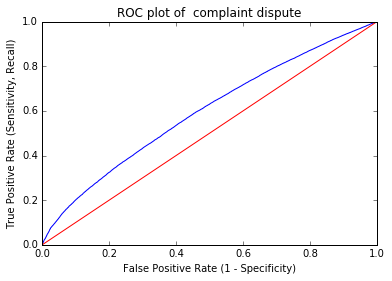

In [76]:
plot_roc(v_probs, y_test, "ROC plot of  complaint dispute", 
         "False Positive Rate (1 - Specificity)", "True Positive Rate (Sensitivity, Recall)")

In [77]:
import sklearn.metrics as skm
skm.roc_auc_score(y_test, v_probs)

0.59700964700073367

In [78]:
pd.crosstab(y_test, lr.predict(X_test_scale))

col_0,0,1
Consumer disputed?,,
0,12652,8971
1,38706,47270


In [79]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_true):
    cm = confusion_matrix(y_true, model.predict(X_test))

    print(cm)

    # Show confusion matrix in a separate window
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

[[12652  8971]
 [38706 47270]]


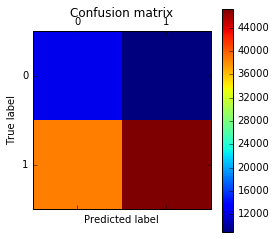

In [80]:
plot_confusion_matrix(lr, X_test_scale, y_test)

## Now try descision tree model

In [81]:
##Gradiend Boosting Classifier
#from sklearn.ensemble import GradientBoostingClassifier

In [82]:
#gbc = GradientBoostingClassifier(n_estimators=2000, max_depth=4, subsample=0.5, 
                                 max_features='auto', learning_rate=0.01)
#gbc.fit(X_train_scale, y_train)

KeyboardInterrupt: 

In [ ]:
#gbc.score(X_test_scale,y_test)

In [ ]:
#pd.crosstab(y_test, gbc.predict(X_test_scale))

In [ ]:
#plot_confusion_matrix(gbc, X_test_scale, y_test)

In [83]:
#skm.roc_auc_score(y_test, gbc.predict_proba(X_test_scale)[:, 1])

In [84]:
def plot_importance(clf, X, max_features=10):
    '''Plot feature importance'''
    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    
    # Show only top features
    pos = pos[-max_features:]
    feature_importance = (feature_importance[sorted_idx])[-max_features:]
    feature_names = (X.columns[sorted_idx])[-max_features:]
    
    plt.barh(pos, feature_importance, align='center')
    plt.yticks(pos, feature_names)
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')

In [85]:
#plot_importance(gbc, X, max_features=20)

AttributeError: 'NoneType' object has no attribute 'feature_importances_'

In [86]:
## Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [87]:
rfc = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='auto')
rfc.fit(X_train_scale, y_train)

RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [88]:
rfc.score(X_test_scale, y_test)

0.76463535906467528

In [89]:
pd.crosstab(y_test, rfc.predict(X_test_scale))

col_0,0,1
Consumer disputed?,,
0,2957,18666
1,6659,79317


In [90]:
skm.roc_auc_score(y_test, rfc.predict_proba(X_test_scale)[:, 1])

0.58975927320841071

[[ 2957 18666]
 [ 6659 79317]]


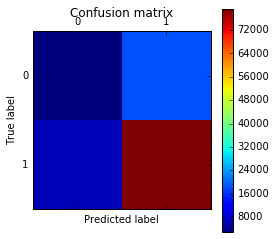

In [91]:
plot_confusion_matrix(rfc, X_test_scale, y_test)

In [ ]:
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.tree import DecisionTreeClassifier

In [ ]:
#adb = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                         algorithm="SAMME",
                         n_estimators=5000)

#adb.fit(X_train, y_train)

In [ ]:
#adb.score(X_test, y_test)

In [ ]:
#skm.roc_auc_score(y_test, adb.predict_proba(X_test)[:, 1])

In [ ]:
#from sklearn.svm import SVC
#svc = SVC()
#svc.fit(X_train, y_train) 

In [ ]:
#svc.score(X_test, y_test)

In [ ]:
#skm.roc_auc_score(y_test, svc.predict_proba(X_test)[:, 1])

## Optimize the parameter by GridSearchCV

Gradient Boosting GridSearch

In [ ]:
#gbc_grid = {'learning_rate': [0.05, 0.01],'max_depth': [3, 8],
  # 'n_estimators': [500, 1000],'subsample': [0.5, 0.75, 1.0]}


In [ ]:
#gbc_grid_cv = GridSearchCV(GradientBoostingClassifier(), gbc_grid, n_jobs=-1)

In [ ]:
#gbc_grid_cv.fit(X_train, y_train)

In [ ]:
#best_model = gbc_grid_cv.best_estimator_

In [ ]:
#best_params = gbc_grid_cv.best_params_
#best_params

In [ ]:
#gbc_grid_cv.best_score_

In [ ]:
#skm.roc_auc_score(y_test, predict_proba(X_test)[:, 1])

In [ ]:
#def plot_importance(clf, X, max_features=10):
    #'''Plot feature importance'''
    #feature_importance = clf.feature_importances_
    # make importances relative to max importance
    #feature_importance = 100.0 * (feature_importance / feature_importance.max())
    #sorted_idx = np.argsort(feature_importance)
    #pos = np.arange(sorted_idx.shape[0]) + .5
    
    # Show only top features
    #pos = pos[-max_features:]
   # feature_importance = (feature_importance[sorted_idx])[-max_features:]
   # feature_names = (X.columns[sorted_idx])[-max_features:]
    
   # plt.barh(pos, feature_importance, align='center')
    #plt.yticks(pos, feature_names)
    #plt.xlabel('Relative Importance')
    #plt.title('Variable Importance')

In [ ]:
plot_importance(best_model, X_train, max_features=16)

In [ ]:
#def plot_loss(clf, params):
    '''Plot training deviance.  Stolen from sklearn documentation'''    
    # compute test set deviance
   # test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

    #for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
       # test_score[i] = clf.loss_(y_test, y_pred)

    #plt.title('Deviance')
    #plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
             #label='Training Set Deviance')
    #plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
             #label='Test Set Deviance')
    #plt.legend(loc='upper right')
    #plt.xlabel('Boosting Iterations')
   # plt.ylabel(clf.loss)

In [ ]:
#plot_loss(best_model, best_params)

In [ ]:
#plot_confusion_matrix(best_model, X_test, y_test)

Random Forest Grid Search

In [ ]:
#rf_grid = {'max_depth': [4, 8, None],'max_features': ['sqrt', 'log2', None],'min_samples_split': [1, 2, 4],
    #'min_samples_leaf': [1, 2, 4],'bootstrap': [True], # Mandatory with oob_score=True,
           #'n_estimators': [50, 100, 200, 400],'random_state': [67],'oob_score': [True],'n_jobs': [-1] }

In [ ]:
#rf_grid_cv = GridSearchCV(RandomForestClassifier(),rf_grid,n_jobs=-1,verbose=True,scoring='roc_auc')

In [ ]:
#rf_grid_cv.fit(X_train, y_train)

In [ ]:
#rf_grid_cv.best_params_

In [ ]:
#rf_grid_cv.best_score_

In [ ]:
#best_model = rf_grid_cv.best_estimator_

In [ ]:
#best_model.oob_score_

In [ ]:
#skm.roc_auc_score(y_test, best_model.predict(X_test))

In [ ]:
#plot_confusion_matrix(best_model, X_test, y_test)